# R3 Internal lab - Supervised Learning 


# Building a Student Performace Prediction System



The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [52]:
import pandas as pd
st_data=pd.read_csv("students-data.csv",delimiter=';')
st_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [53]:
st_data.shape

(395, 33)

In [54]:
st_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


# Question 2 - drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [55]:
st_data.rename_axis(index='number').head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [56]:
import random
import numpy as np
rows = np.random.choice(st_data.index.values, 100)
sampled_df = st_data.iloc[rows]
print(sampled_df.isna().sum())
print("There are no missing values")

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
There are no missing values


NameError: name 'sns' is not defined

# Transform Data

## Question 3 

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [58]:
st_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [59]:
obj_data=st_data.select_dtypes(exclude='int64')
obj_data.columns
#All attributes which are not numerical

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [60]:
num_data=st_data.select_dtypes(include='int64')
num_data.columns
#All attributes which are numerical

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

# Question 4 - Drop variables with less variance 

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [61]:
num_data.var()


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [62]:
num_data.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)
num_data.var()

C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [63]:
num_data.shape

(395, 10)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [64]:
print(obj_data.info())
obj_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
school        395 non-null object
sex           395 non-null object
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
dtypes: object(17)
memory usage: 52.5+ KB
None


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [199]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [66]:
obj_data=obj_data.apply(le.fit_transform)
obj_data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


# Question 6 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [67]:
num_data.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10


In [68]:
num_data['G1']= le.fit_transform(num_data['G1']>=10) 
num_data['G2']= le.fit_transform(num_data['G2']>=10) 
num_data['G3']= le.fit_transform(num_data['G3']>=10) 
num_data.head()

C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,4,1,3,6,0,0,0
1,17,1,1,3,1,3,4,0,0,0
2,15,1,1,2,3,3,10,0,0,1
3,15,4,2,2,1,5,2,1,1,1
4,16,3,3,2,2,5,4,0,1,1


# Question 7 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

In [69]:
new_data = pd.concat([obj_data,num_data],axis=1)
new_data.shape

(395, 27)

In [70]:
X=new_data[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'age', 'Medu', 'Fedu',
       'goout', 'Walc', 'health', 'absences', 'G1', 'G2']]
Y=new_data[['G3']]


# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2405, 
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(300, 26)
(95, 26)


# Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rezekiel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print("The accuracy score is")
metrics.accuracy_score(y_test,predictions)


              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

   micro avg       0.91      0.91      0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95

[[25  3]
 [ 6 61]]
The accuracy score is


0.9052631578947369

## Section 2 - K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1 - Import the data set and print 10 random rows from the data set

In [192]:
Iris=pd.read_csv("Iris.csv")
rows = np.random.choice(Iris.index.values, 10)
sample_iris = Iris.iloc[rows]
sample_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,37,5.5,3.5,1.3,0.2,Iris-setosa
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica
26,27,5.0,3.4,1.6,0.4,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [193]:
Iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [194]:
Iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [195]:
print(Iris.median())
Iris.fillna(Iris.median(),inplace=True)
Iris.isna().sum()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [198]:
Iris_obj=Iris.select_dtypes(include='object')
Iris_num=Iris.select_dtypes(exclude='object')


In [200]:
Iris_obj=Iris_obj.apply(le.fit_transform)
Iris_obj.iloc[rows]

,Species
36,0
91,1
136,2
26,0
37,0
139,2
128,2
15,0
139,2
138,2


In [201]:
new_data = pd.concat([Iris_obj,Iris_num],axis=1)


## Question 4 - Observe the association of each independent variable with target variable 
Drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

In [202]:
new_data.corr()
# There are no independent variables with correlation in the range -0.1 to 0.1

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,1.000000,0.942753,0.775061,-0.417318,0.944477,0.952513
Id,0.942753,1.000000,0.702734,-0.392693,0.872346,0.890676
SepalLengthCm,0.775061,0.702734,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.417318,-0.392693,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.944477,0.872346,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.952513,0.890676,0.815986,-0.356510,0.962043,1.000000


## Question 5 - Observe the independent variables variance 

drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [203]:
new_data.var()

Species             0.675322
Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
dtype: float64

## Question 6 - Plot the scatter matrix for all the variables 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229F80F2AC8>,
      dtype=object)

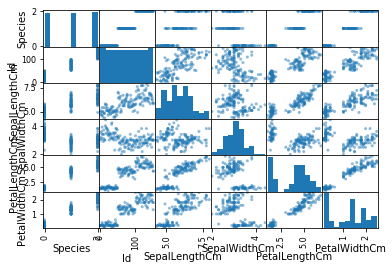

In [204]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_data)

## Split the dataset into training and test sets

## Question 7 - Split the dataset into training and test sets with 80-20 ratio

In [205]:
from sklearn.model_selection import train_test_split
X=Iris_num
Y=Iris_obj

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, 
                                                    random_state=101)


## Question 8 - Model 

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
NNH = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
NNH.fit(X_train,y_train)
predicted1=NNH.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [241]:
NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train,y_train)
predicted2=NNH.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [227]:
NNH = KNeighborsClassifier(n_neighbors= 9 )
NNH.fit(X_train,y_train)
predicted3=NNH.predict(X_test)

from sklearn import metrics
print("Accuracy score for k=3 is",metrics.accuracy_score(y_test, predicted1))
print("Accuracy score for k=5 is",metrics.accuracy_score(y_test, predicted2))
print("Accuracy score for k=9 is",metrics.accuracy_score(y_test, predicted3))

print("Consfusion Matrix for k=3",metrics.confusion_matrix(y_test,predicted1))
print("Consfusion Matrix for k=5",metrics.confusion_matrix(y_test,predicted2))
print("Consfusion Matrix for k=9",metrics.confusion_matrix(y_test,predicted3))

Accuracy score for k=3 is 1.0
Accuracy score for k=5 is 1.0
Accuracy score for k=9 is 0.967741935483871
Consfusion Matrix for k=3 [[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]
Consfusion Matrix for k=5 [[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]
Consfusion Matrix for k=9 [[10  0  0]
 [ 0 12  1]
 [ 0  0  8]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Question 9 - Cross Validation 

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [234]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

myList = list(range(1,20))

neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

In [243]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)




The optimal number of neighbors is 1


## Question 10 - Plot

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

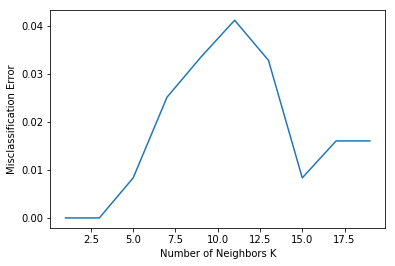

In [242]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Section 3 - Optional - Naive Bayes with Iris Data

The below section is optional and will not be graded


In [ ]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

Problem statement
Dataset
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

Attributes of the dataset: https://archive.ics.uci.edu/ml/datasets/Iris

### Load the iris data set 

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [ ]:
#Check the dataset
print(y)
print(X)

# Question 1 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

# Question 2 
Find Correlation among all variables and give your insights

### Split data in Training and test set in 80:20.

# Question 3 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

# Question 4 
Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [ ]:
#Predict

# Question 5 
Print Accuracy and Confusion Matrix and Conclude your findings

In [ ]:
# show Confusion Matrix

In [ ]:
# show accuracy

In [ ]:
#Show precision and Recall metrics